# Regressão Linear 

Vamos analisar um dataset de uma empresa de comércio eletrônico com sede em Nova York que vende roupas online mas também
tem sessões de consultoria de estilo e vestuário em sua loja física.
Os clientes entram na loja, têm sessões / reuniões com um estilista pessoal, então podem ir para casa e encomendarem em um aplicativo móvel ou site para a roupa que desejam.

**A empresa está tentando decidir se deve concentrar seus esforços em sua experiência em aplicativos móveis ou em seu site. Vamos analisar qual é a melhor solução.**

Obs: Todos os dados deste dataset são ficticios!

**Vamos importar nossas bibliotecas**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Obter dados

**Trabalharemos com o arquivo csv do Ecommerce Customers da empresa. Possui informações do cliente, como Email, Endereço e seu Avatar.**

* Avg. Session Length: Tempo médio das sessões de consultoria de estilo na loja.
* Time on App: tempo médio gasto no app em minutos.
* Time on Website: tempo médio gasto no site em minutos.
* Lenght of Membership: Há quantos anos o cliente é membro.



In [7]:
customers = pd.read_csv("Ecommerce_Customers")

**Vamos dar uma olhada nos dados:**

In [8]:
customers.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [9]:
customers.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [10]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
Email                   500 non-null object
Address                 500 non-null object
Avatar                  500 non-null object
Avg. Session Length     500 non-null float64
Time on App             500 non-null float64
Time on Website         500 non-null float64
Length of Membership    500 non-null float64
Yearly Amount Spent     500 non-null float64
dtypes: float64(5), object(3)
memory usage: 31.3+ KB


## Análise de dados exploratória

**Vamos ver as relações existentes entre os dados criando um pairplot**

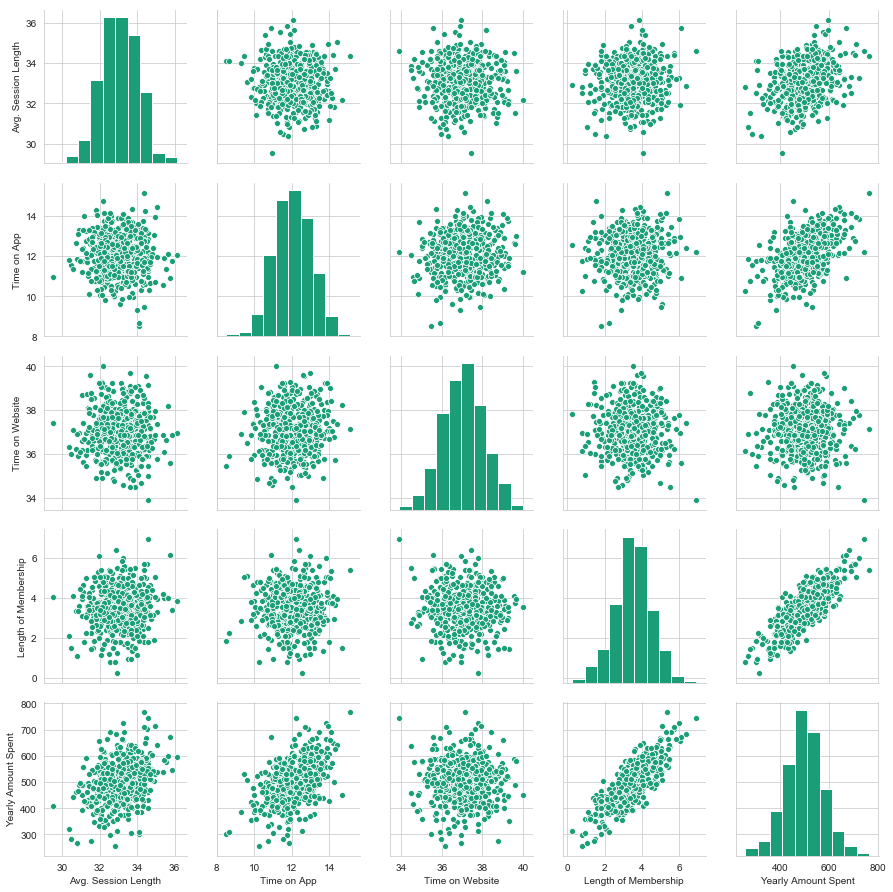

In [23]:
sns.set_palette("Dark2")
sns.set_style('whitegrid')

sns.pairplot(customers)

**Primeiramente, vamos analisar mais de perto se o tempo gasto no site tem relação com a quantia gasta por ano**

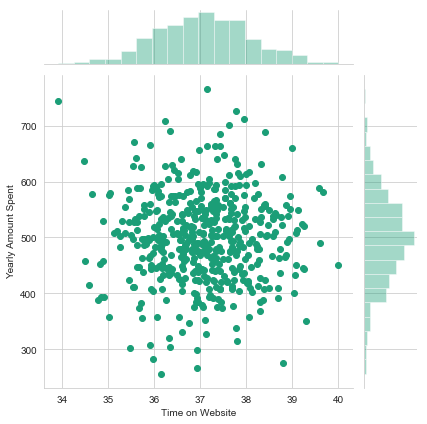

In [20]:
sns.jointplot(x='Time on Website',y='Yearly Amount Spent',data=customers)

**Mais tempo no site se converte em maior faturamento!**

**Vamos ver se essa relação é parecida se comparada ao tempo no aplicativo:**

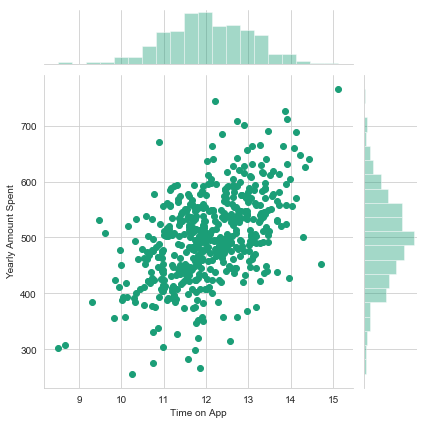

In [21]:
sns.jointplot(x='Time on App',y='Yearly Amount Spent',data=customers)

**Podemos ver que a relação é ainda mais forte quando a navegação é feita pelo app!**

**Vamos analisar agora se o tempo como menbro tem relação com o valor anual gasto:**

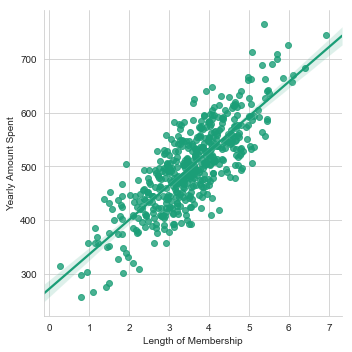

In [24]:
sns.lmplot(x='Length of Membership',y='Yearly Amount Spent',data=customers)

**Relação ainda mais forte!** 

Agora vamos treinar nosso modelo de machine learning para aprender com os dados

## Treinando e testando os dados

Agora que exploramos um pouco os dados, vamos avançar e dividir os dados em conjuntos de treinamento e teste.

**Vamos separar nossos dados para confrontar os dados da coluna "Yearly Amount Spent"**

In [28]:
y = customers['Yearly Amount Spent']

In [29]:
X = customers[['Avg. Session Length', 'Time on App','Time on Website', 'Length of Membership']]

**Vamos dividir nossos dados em teste e treino**

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

## Treinando o modelo

Agora é hora de treinar nosso modelo em nossos dados de treinamento!

**Vamos importar o LinearRegression da biblioteca sklearn:**

In [32]:
from sklearn.linear_model import LinearRegression

**Vamos  criar uma instância de um modelo LinearRegression () chamado lm.**

In [33]:
lm = LinearRegression()

**Agora vamos treina-lo!**

In [34]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

## Previsão de dados de teste

**Agora que nos ajustamos ao nosso modelo, vamos avaliar o seu desempenho ao prever os valores de teste!**


In [35]:
predictions = lm.predict( X_test)

**Vamos analisar a dispersão dos dados preditos com os dados de teste:**

Text(0, 0.5, 'Predicted Y')

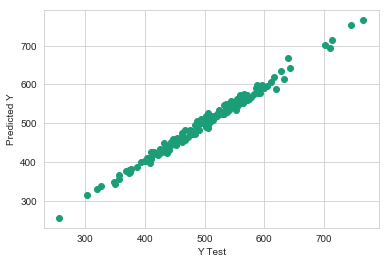

In [36]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

## Avaliando o Modelo



## Resíduos

**Vamos explorar rapidamente os resíduos para garantir que tudo esteja bem com os nossos dados.**

Vamos usar um histograma para avaliar a distribuição dos resíduos:

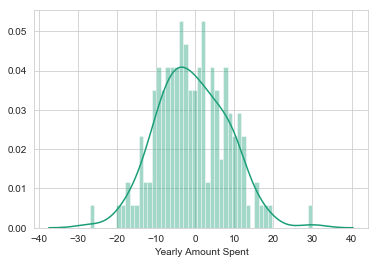

In [38]:
sns.distplot((y_test-predictions),bins=50);

## Conclusão
Ainda desejamos descobrir a resposta à pergunta original, concentramos-nos no desenvolvimento de aplicativos móveis ou de sites? Ou talvez isso realmente não importe, e o tempo como membro é o que é realmente importante?

**Vamos ver se podemos interpretar os coeficientes para ter uma idéia.**


In [40]:
coeffecients = pd.DataFrame(lm.coef_,X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


## Interpretando os coeficientes:

**Mantendo todos as outras variáveis constantes**, um aumento de 1 unidade na média de tempo de uso está associado a um aumento de 25,98 dólares totais gastos.

**Mantendo todos as outras variáveis constantes**, um aumento de 1 unidade no tempo gasto no App está associado a um aumento de 38,59 dólares totais gastos.

**Mantendo todos as outras variáveis constantes**, um aumento de 1 unidade no tempo no site está associado a um aumento de 0,19 dólares em dólares.

**Mantendo todos as outras variáveis constantes**, um aumento de 1 unidade no tempo de Associação está associado a um aumento de 61,27 dólares em dólares.

## Insights

**--  Primeiramente, a empresa provevelmente deveria arranjar outras formas de fidelizar seu cliente, já que essa é a variável que mais ifluencia os gastos dos seus usuários.**

--  Entre site e aplicativo, investiriamos no aplicavo, dado que o mesmo apresenta um coeficiente significativamente maior do que o site.**

--  É possível ver também que o uso da loja física também trás um retorno significativo comparado ao site**

In [2]:
x = 4.
print(round(x))

4
